# P02_06_EDA

In [1]:
section_fig_main_title = 'P02_06_EDA_'

In [2]:
import os, sys
import requests
from urllib.parse import urljoin, urlparse
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import lag_plot

In [3]:
from pandas.plotting import autocorrelation_plot
from sklearn.feature_selection import VarianceThreshold

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [6]:
from sklearn import metrics
import statsmodels.api as sm

## Read Data

the page html file downloaded in Data directory and it is loaded below.

In [7]:
# csv_path = "../Data/Data_ICME_scraped.csv"
# data = pd.read_csv(csv_path, parse_dates=True)

csv_path = "../Data/P02_05_EDA_Data.csv"
data = pd.read_csv(csv_path, parse_dates=True, infer_datetime_format=True)

In [8]:
data.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),Evidence of BiDirectional suprathermal Electron strahls (BDE),"""quality"" of the boundary times",Increase in solar wind speed at the upstream disturbance (shock/wave),solar wind speed km/s,Mean magnetic field strength in the ICME,magnetic cloud has been reported,minimum value of the geomagnetic,Mean 1 AU transit speed of the disturbance,forward fast shock happens,"""quality"" of the boundary times*",Evidence of BiDirectional suprathermal Electron strahls (BDE)*,Increase in solar wind speed at the upstream disturbance (shock/wave)*,magnetic cloud has been reported*,minimum value of the geomagnetic*,Mean 1 AU transit speed of the disturbance*
0,1996-05-27 15:00:00,N,2,0,370,9,2,-33,...,No,2.0,no Evidence,0,magnetic cloud has been reported,-33,0
1,1996-07-01 18:00:00,N,3,40,360,11,2,-20,...,No,3.0,no Evidence,40,magnetic cloud has been reported,-20,0
2,1996-08-07 12:00:00,N,2,10,350,7,2,-23,...,No,2.0,no Evidence,10,magnetic cloud has been reported,-23,0
3,1996-12-23 17:00:00,N,2,20,360,10,2,-18,435,No,2.0,no Evidence,20,magnetic cloud has been reported,-18,435
4,1997-01-10 04:00:00,Y,1,100 S,450,14,2,-78,507,Yes,1.0,some Evidence,100,magnetic cloud has been reported,-78,507


In [9]:
data.columns

Index(['ICME Plasma/Field Start Y/M/D (UT) (b)',
       'Evidence of BiDirectional suprathermal Electron strahls (BDE)',
       '"quality" of the boundary times',
       'Increase in solar wind speed at the upstream disturbance (shock/wave)',
       'solar wind speed km/s', 'Mean magnetic field strength in the ICME',
       'magnetic cloud has been reported', 'minimum value of the geomagnetic',
       'Mean 1 AU transit speed of the disturbance',
       'forward fast shock happens', '"quality" of the boundary times*',
       'Evidence of BiDirectional suprathermal Electron strahls (BDE)*',
       'Increase in solar wind speed at the upstream disturbance (shock/wave)*',
       'magnetic cloud has been reported*',
       'minimum value of the geomagnetic*',
       'Mean 1 AU transit speed of the disturbance*'],
      dtype='object')

In [10]:
# keep_cols = ['ICME Plasma/Field Start Y/M/D (UT) (b)',
#        'forward fast shock happens', '"quality" of the boundary times*',
#        'Evidence of BiDirectional suprathermal Electron strahls (BDE)*',
#        'Increase in solar wind speed at the upstream disturbance (shock/wave)*',
#        'magnetic cloud has been reported*',
#        'minimum value of the geomagnetic*',
#        'Mean 1 AU transit speed of the disturbance*']
# data = data[keep_cols]

In [11]:
data.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),Evidence of BiDirectional suprathermal Electron strahls (BDE),"""quality"" of the boundary times",Increase in solar wind speed at the upstream disturbance (shock/wave),solar wind speed km/s,Mean magnetic field strength in the ICME,magnetic cloud has been reported,minimum value of the geomagnetic,Mean 1 AU transit speed of the disturbance,forward fast shock happens,"""quality"" of the boundary times*",Evidence of BiDirectional suprathermal Electron strahls (BDE)*,Increase in solar wind speed at the upstream disturbance (shock/wave)*,magnetic cloud has been reported*,minimum value of the geomagnetic*,Mean 1 AU transit speed of the disturbance*
0,1996-05-27 15:00:00,N,2,0,370,9,2,-33,...,No,2.0,no Evidence,0,magnetic cloud has been reported,-33,0
1,1996-07-01 18:00:00,N,3,40,360,11,2,-20,...,No,3.0,no Evidence,40,magnetic cloud has been reported,-20,0
2,1996-08-07 12:00:00,N,2,10,350,7,2,-23,...,No,2.0,no Evidence,10,magnetic cloud has been reported,-23,0
3,1996-12-23 17:00:00,N,2,20,360,10,2,-18,435,No,2.0,no Evidence,20,magnetic cloud has been reported,-18,435
4,1997-01-10 04:00:00,Y,1,100 S,450,14,2,-78,507,Yes,1.0,some Evidence,100,magnetic cloud has been reported,-78,507


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 16 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   ICME Plasma/Field Start Y/M/D (UT) (b)                                  513 non-null    object 
 1   Evidence of BiDirectional suprathermal Electron strahls (BDE)           513 non-null    object 
 2   "quality" of the boundary times                                         513 non-null    object 
 3   Increase in solar wind speed at the upstream disturbance (shock/wave)   513 non-null    object 
 4   solar wind speed km/s                                                   513 non-null    int64  
 5   Mean magnetic field strength in the ICME                                513 non-null    int64  
 6   magnetic cloud has been reported                                        513 non-nu

In [13]:
data.isnull().sum()

ICME Plasma/Field Start Y/M/D (UT) (b)                                     0
Evidence of BiDirectional suprathermal Electron strahls (BDE)              0
"quality" of the boundary times                                            0
Increase in solar wind speed at the upstream disturbance (shock/wave)      0
solar wind speed km/s                                                      0
Mean magnetic field strength in the ICME                                   0
magnetic cloud has been reported                                           0
minimum value of the geomagnetic                                           0
Mean 1 AU transit speed of the disturbance                                 1
forward fast shock happens                                                 0
"quality" of the boundary times*                                           0
Evidence of BiDirectional suprathermal Electron strahls (BDE)*            12
Increase in solar wind speed at the upstream disturbance (shock/wave)*     0

In [14]:
data.describe()

,solar wind speed km/s,Mean magnetic field strength in the ICME,"""quality"" of the boundary times*",Increase in solar wind speed at the upstream disturbance (shock/wave)*,minimum value of the geomagnetic*,Mean 1 AU transit speed of the disturbance*
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,454.405458,9.709552,2.145224,77.290448,-55.725146,324.068226
std,103.537467,4.325552,0.736109,91.840275,61.816295,395.018410
min,290.000000,2.000000,1.000000,0.000000,-422.000000,0.000000
25%,390.000000,7.000000,2.000000,30.000000,-79.000000,0.000000
50%,430.000000,9.000000,2.000000,50.000000,-38.000000,0.000000
75%,500.000000,12.000000,3.000000,100.000000,-13.000000,616.000000
max,1300.000000,33.000000,3.500000,900.000000,9.000000,2185.000000


In [15]:
data.columns

Index(['ICME Plasma/Field Start Y/M/D (UT) (b)',
       'Evidence of BiDirectional suprathermal Electron strahls (BDE)',
       '"quality" of the boundary times',
       'Increase in solar wind speed at the upstream disturbance (shock/wave)',
       'solar wind speed km/s', 'Mean magnetic field strength in the ICME',
       'magnetic cloud has been reported', 'minimum value of the geomagnetic',
       'Mean 1 AU transit speed of the disturbance',
       'forward fast shock happens', '"quality" of the boundary times*',
       'Evidence of BiDirectional suprathermal Electron strahls (BDE)*',
       'Increase in solar wind speed at the upstream disturbance (shock/wave)*',
       'magnetic cloud has been reported*',
       'minimum value of the geomagnetic*',
       'Mean 1 AU transit speed of the disturbance*'],
      dtype='object')

# Check out columns unique values percentage

In [16]:
uniq_index = list(data.nunique().index)
uniq_values = list(data.nunique())

num_rows = data.shape[0]

uniq_percent = [(val*100)/num_rows for val in uniq_values]
for i, uniq in enumerate(uniq_percent):
    
    # print columns with low number of unique values
#     if uniq < 1:

        
    print(uniq_index[i])
    print(round(uniq, 2))

ICME Plasma/Field Start Y/M/D (UT) (b)
100.0
Evidence of BiDirectional suprathermal Electron strahls (BDE)
0.78
"quality" of the boundary times
0.97
Increase in solar wind speed at the upstream disturbance (shock/wave)
12.28
solar wind speed km/s
9.94
Mean magnetic field strength in the ICME
4.87
magnetic cloud has been reported
0.78
minimum value of the geomagnetic
43.47
Mean 1 AU transit speed of the disturbance
24.37
forward fast shock happens
0.39
"quality" of the boundary times*
0.97
Evidence of BiDirectional suprathermal Electron strahls (BDE)*
0.58
Increase in solar wind speed at the upstream disturbance (shock/wave)*
7.41
magnetic cloud has been reported*
0.78
minimum value of the geomagnetic*
30.99
Mean 1 AU transit speed of the disturbance*
23.78


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 16 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   ICME Plasma/Field Start Y/M/D (UT) (b)                                  513 non-null    object 
 1   Evidence of BiDirectional suprathermal Electron strahls (BDE)           513 non-null    object 
 2   "quality" of the boundary times                                         513 non-null    object 
 3   Increase in solar wind speed at the upstream disturbance (shock/wave)   513 non-null    object 
 4   solar wind speed km/s                                                   513 non-null    int64  
 5   Mean magnetic field strength in the ICME                                513 non-null    int64  
 6   magnetic cloud has been reported                                        513 non-nu

## Data distribution

checking out the data skewness and distribution

In [97]:
keep_cols = ['ICME Plasma/Field Start Y/M/D (UT) (b)',
            'solar wind speed km/s', 
            'Mean magnetic field strength in the ICME',
            '"quality" of the boundary times*',
            'Increase in solar wind speed at the upstream disturbance (shock/wave)*',
            'minimum value of the geomagnetic*',
            'Mean 1 AU transit speed of the disturbance*'
            ]

data_2 = data[keep_cols]

In [98]:
data_2.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),solar wind speed km/s,Mean magnetic field strength in the ICME,"""quality"" of the boundary times*",Increase in solar wind speed at the upstream disturbance (shock/wave)*,minimum value of the geomagnetic*,Mean 1 AU transit speed of the disturbance*
0,1996-05-27 15:00:00,370,9,2.0,0,-33,0
1,1996-07-01 18:00:00,360,11,3.0,40,-20,0
2,1996-08-07 12:00:00,350,7,2.0,10,-23,0
3,1996-12-23 17:00:00,360,10,2.0,20,-18,435
4,1997-01-10 04:00:00,450,14,1.0,100,-78,507


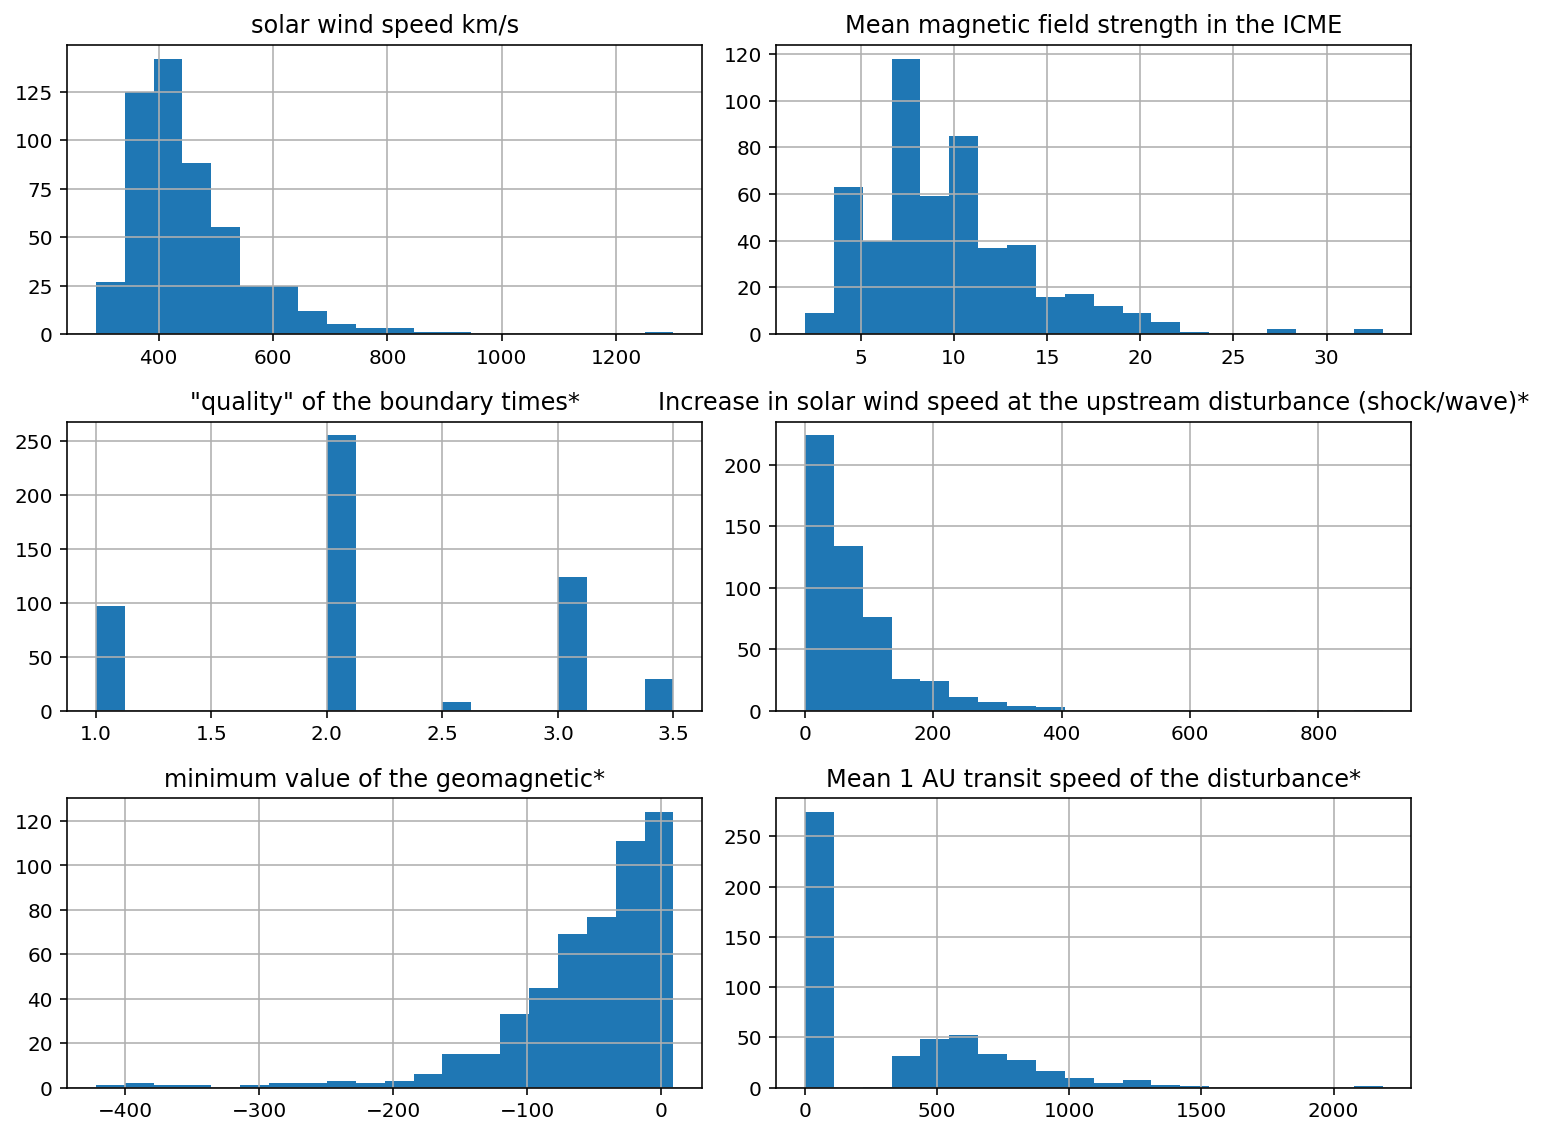

In [102]:
data_2.hist(bins=20, 
            figsize=(10,8), 
#             log=True,
           )

plt.tight_layout()
plt.show()

In [103]:
cols_trans = ['solar wind speed km/s', 
            'Mean magnetic field strength in the ICME',
            'Increase in solar wind speed at the upstream disturbance (shock/wave)*',
            'minimum value of the geomagnetic*',
            'Mean 1 AU transit speed of the disturbance*'
            ]
data_3 = data_2[cols_trans]

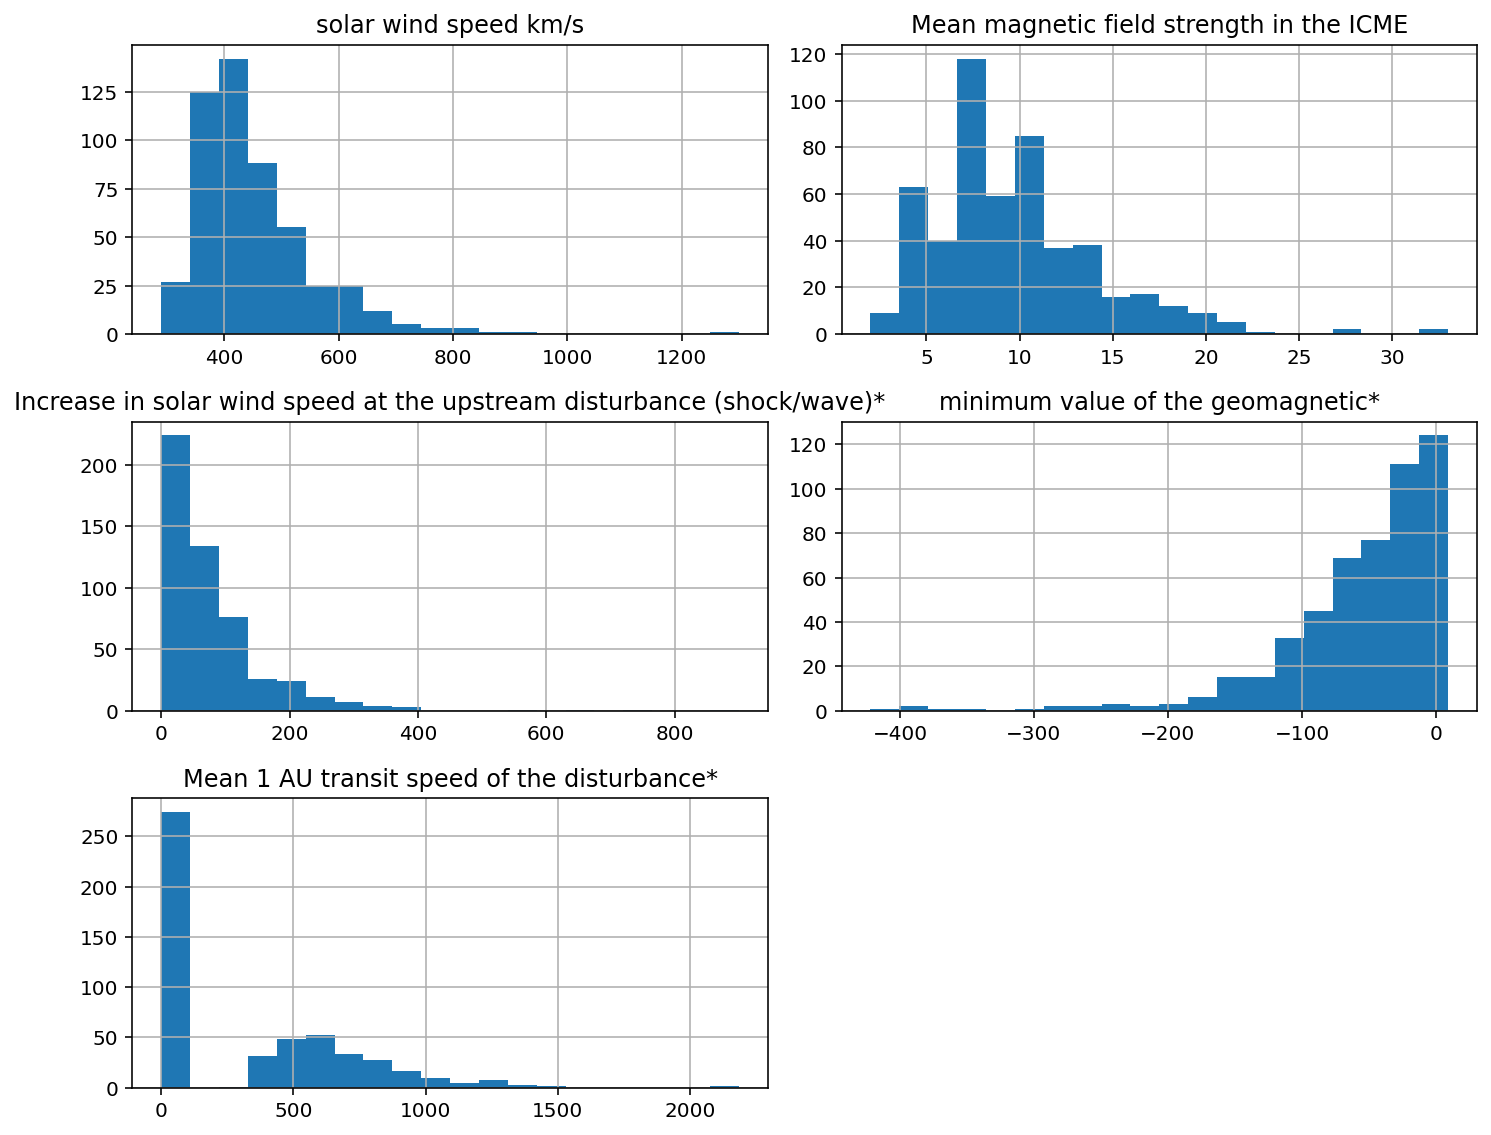

In [104]:
data_3.hist(bins=20, 
            figsize=(10,8), 
#             log=True,
           )

plt.tight_layout()
plt.show()